<h1>C964 Capstone Project</h1>

<h5>Installing dependencies</h5>

In [34]:
!pip install tensorflow tensorflow opencv-python matplotlib
!pip install pandas
!pip install dash
!pip install plotly

You should consider upgrading via the 'c:\users\baile\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\baile\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\baile\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\baile\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [35]:
import pandas as pd
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

<h5>Defines the directory that containg the datasets photos</h5>

In [36]:
Photo_dir = 'C964photos'

<h5>Loads and preprocesses the dataset using TensorFlow</h5>

In [37]:
data = tf.keras.utils.image_dataset_from_directory('C964photos')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 9969 files belonging to 2 classes.


<h5>Displaying information about the dataset</h5>

In [38]:
print(f"Batch Shape: {batch[0].shape}")
print(f"Labels (0 = Other Images, 1 = Traffic Signs): {batch[1]}")

Batch Shape: (32, 256, 256, 3)
Labels (0 = Other Images, 1 = Traffic Signs): [0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1]


<h5>Visualizing some of the images from the batch to determine which are traffic signs and which are not</h5>

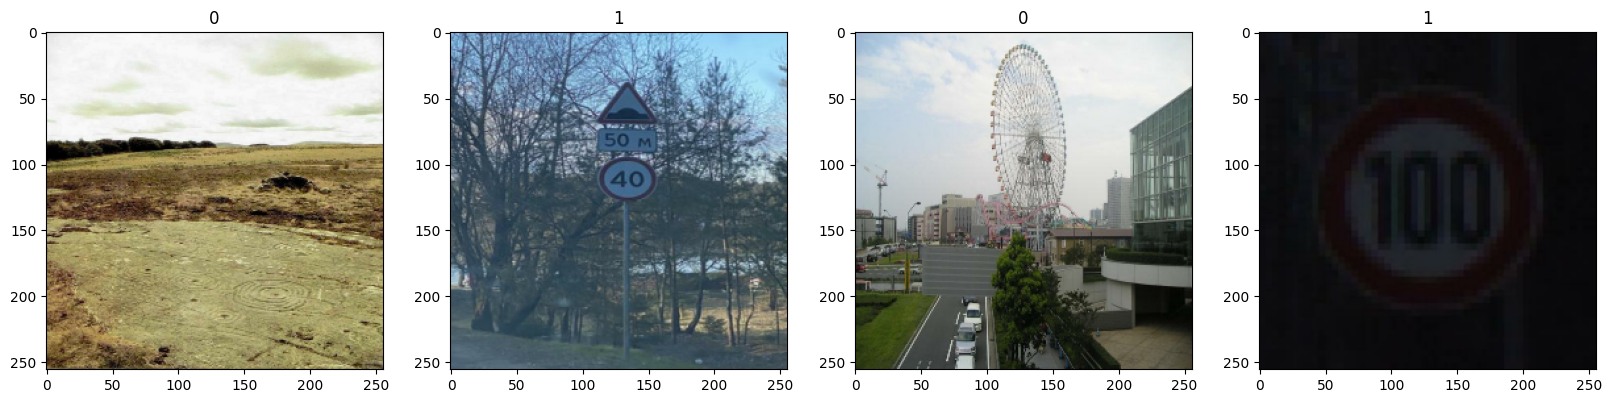

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

<h5>Normalize pixel values in the dataset</h5>

In [40]:
data = data.map(lambda x,y: (x/255, y))

In [41]:
print(f"Maximum Pixel Value After Normalization: {data.as_numpy_iterator().next()[0].max()}")

Maximum Pixel Value After Normalization: 1.0


<h5>Splitting the dataset into three separate sets, one for training the model, one for validating the model, and one for testing the model</h5>

In [42]:
training_set = int(len(data)*.7)
validation_set = int(len(data)*.2)
testing_set = int(len(data)*.1)+1

In [43]:
train = data.take(training_set)
validate = data.skip(training_set).take(validation_set)
testing = data.skip(training_set+validation_set).take(testing_set)

<h5>Creating the Convolutional Neural Network (CNN) model</h5>

In [44]:
learning_model = Sequential()
learning_model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
learning_model.add(MaxPooling2D())
learning_model.add(Conv2D(32, (3,3), 1, activation='relu'))
learning_model.add(MaxPooling2D())
learning_model.add(Conv2D(16, (3,3),1, activation='relu'))
learning_model.add(MaxPooling2D())
learning_model.add(Flatten())
learning_model.add(Dense(256, activation='relu'))
learning_model.add(Dense(1, activation='sigmoid'))

<h5>Compile the model</h5>

In [45]:
learning_model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

<h5>Set up TensorBoard for visualization</h5>

In [46]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

<h5>Train the model and log metrics using TensorBoard</h5>

In [47]:
hist = learning_model.fit(train, epochs=20, validation_data=validate, callbacks=[tensorboard_callback])

Epoch 1/20


218/218 [==============================] - 72s 325ms/step - loss: 0.3551 - accuracy: 0.8387 - val_loss: 0.2620 - val_accuracy: 0.8957
Epoch 2/20
218/218 [==============================] - 58s 265ms/step - loss: 0.2313 - accuracy: 0.8998 - val_loss: 0.2070 - val_accuracy: 0.9103
Epoch 3/20
218/218 [==============================] - 56s 254ms/step - loss: 0.1551 - accuracy: 0.9362 - val_loss: 0.1825 - val_accuracy: 0.9259
Epoch 4/20
218/218 [==============================] - 55s 253ms/step - loss: 0.1119 - accuracy: 0.9547 - val_loss: 0.2187 - val_accuracy: 0.9360
Epoch 5/20
218/218 [==============================] - 56s 256ms/step - loss: 0.0915 - accuracy: 0.9653 - val_loss: 0.2435 - val_accuracy: 0.9209
Epoch 6/20
218/218 [==============================] - 58s 263ms/step - loss: 0.0535 - accuracy: 0.9817 - val_loss: 0.2214 - val_accuracy: 0.9380
Epoch 7/20
218/218 [==============================] - 56s 257ms/step - loss: 0.0400 - accuracy: 0.9852 - val_loss: 0.2375 - val_

<h5>Charts that display the training and validation accuracy over the epochs</h5>

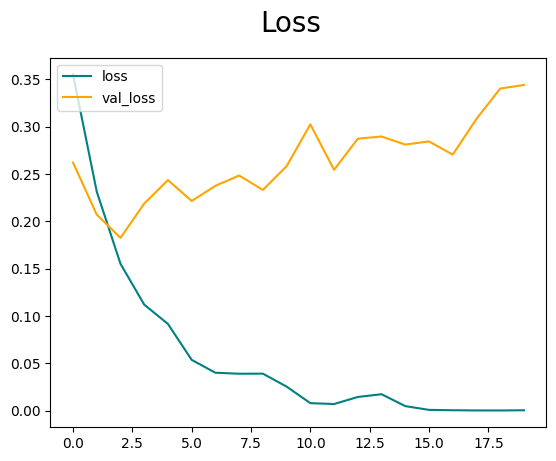

In [49]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

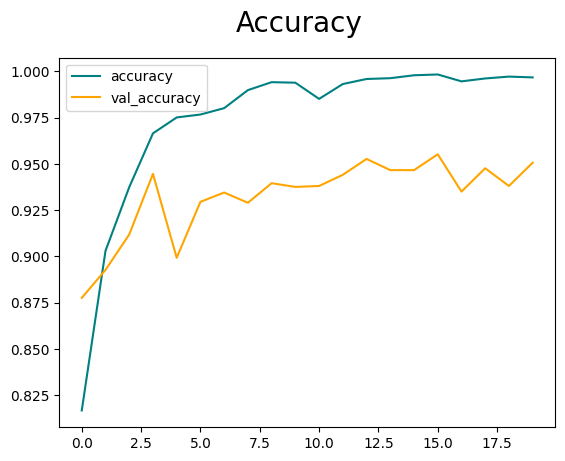

In [49]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<h5>Importing additional libraries for metrics and visualization</h5>

In [50]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import matplotlib.pyplot as plt
import matplotlib.patches as patches

<h5>Initialize metrics for evaluation</h5>

In [56]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

1/1 [==============================] - 2s 2s/step


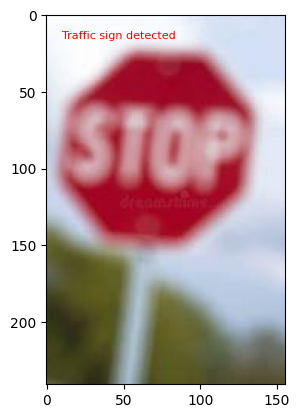

Decision Support for Specific Image: Traffic sign detected. Proceed with caution.
Precision for Specific Image: 0.9461812376976013
Recall for Specific Image: 0.9571657180786133
Accuracy for Specific Image: 0.9518334865570068
0.64508766


In [81]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.applications import MobileNetV2

# Define a function to load and preprocess an image
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = tf.image.resize(image, (256, 256)).numpy() / 255.0
    return image

# Load the MobileNetV2 base model for transfer learning
base_model = MobileNetV2(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Add a global average pooling layer and a dense output layer for binary classification
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define a function for decision support with a customizable threshold
def decision_support(prediction, threshold=0.5):
    if prediction > threshold:
        return "Traffic sign detected. Proceed with caution."
    else:
        return "No traffic sign detected. Normal operation."

# Define the path to the specific image
#specific_image_file = '001444_jpg.rf.97e975e391657ba4036065122ed6423b.jpg'
#specific_image_file = 'test_img_not_traffic_sign.jpg'
specific_image_file = 'test_img_traffic_sign_2.jpg'
#specific_image_file = 'test_img_traffic_sign_3.jpg'
specific_image_path = os.path.join(Photo_dir, specific_image_file)

# Load and preprocess the specific image
specific_image = load_and_preprocess_image(specific_image_path)

# Make a prediction for the specific image
specific_image_prediction = model.predict(np.expand_dims(specific_image, 0))

# Visualize the specific image along with the prediction
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(cv2.imread(specific_image_path), cv2.COLOR_BGR2RGB))

# Add a bounding box or other visualization based on the prediction
prediction_prob = specific_image_prediction[0, 0]
if prediction_prob > 0.5:
    text = 'Traffic sign detected'
    color = 'r'
else:
    text = 'No traffic sign detected'
    color = 'g'

# Add text indicating the prediction
ax.text(10, 10, text, color=color, fontsize=8, ha='left', va='top')

plt.show()

# Use decision_support with a threshold
specific_decision_result = decision_support(specific_image_prediction[0, 0], threshold=0.5)
print(f'Decision Support for Specific Image: {specific_decision_result}')

# Print metrics for the specific image
print(f'Precision for Specific Image: {pre.result().numpy()}')
print(f'Recall for Specific Image: {re.result().numpy()}')
print(f'Accuracy for Specific Image: {acc.result().numpy()}')
print(prediction_prob)

In [68]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9421157836914062, Recall:0.9554656147956848, Accuracy:0.9494549036026001


<h5>Load an image for testing and resize the image</h5>

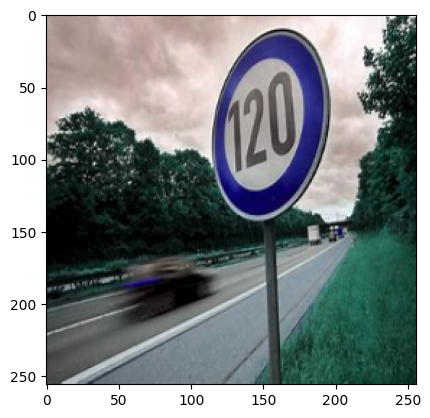

In [69]:
img = cv2.imread('C964photos/test_img_traffic_sign_3.jpg')
plt.imshow(img)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

<h5>Additional test</h5>

In [74]:
for batch in testing.as_numpy_iterator():
    X, y = batch
    yhat = learning_model.predict(X)
    
    # Decision support functionality
    def decision_support(prediction):
        if prediction > 0.5:
            return "Traffic sign detected. Proceed with caution."
        else:
            return "No traffic sign detected. Normal operation."

    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(f'Final Decision Support: {decision_result}')

1/1 [==============================] - 0s 121ms/step
Final Decision Support: Traffic sign detected. Proceed with caution.


<h1>Create a Dataframe</h1>
<h4>After running the next cell the Dash app can be accessed at http://localhost:8050/ to view and interactive with the model, the interactive elements of the model is that you can hover over the data to view the specific data you are looking for</h4>

In [71]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

df = pd.DataFrame({
    'Loss': hist.history['loss'],
    'Val_Loss': hist.history['val_loss'],
    'Accuracy': hist.history['accuracy'],
    'Val_Accuracy': hist.history['val_accuracy'],
})

# Calculate confidence score based on your specific use case
# For example, if you have a single prediction, you can calculate confidence as the absolute difference from 0.5
confidence_score = abs(specific_image_prediction.flatten()[0] - 0.5)

# Add confidence score to the DataFrame
df['Confidence'] = confidence_score

# Function to generate plots
def generate_plots(filtered_df):
    scatter_fig = px.scatter(filtered_df, x='Accuracy', y='Val_Accuracy', title='Scatter: Accuracy vs. Validation Accuracy')
    loss_fig = px.line(filtered_df, x=filtered_df.index, y='Loss', title='Line: Training Loss over Epochs')
    val_loss_fig = px.line(filtered_df, x=filtered_df.index, y='Val_Loss', title='Line: Validation Loss over Epochs')
    accuracy_fig = px.bar(filtered_df, x=filtered_df.index, y='Accuracy', title='Bar: Training Accuracy over Epochs')
    val_accuracy_fig = px.bar(filtered_df, x=filtered_df.index, y='Val_Accuracy', title='Bar: Validation Accuracy over Epochs')
    
    return scatter_fig, loss_fig, val_loss_fig, accuracy_fig, val_accuracy_fig

app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div(children=[
    html.H1(children='Model Training History'),

    # Include your visualizations here
    dcc.Graph(id='scatter-plot'),
    dcc.Graph(id='line-plot'),
    dcc.Graph(id='val-line-plot'),
    dcc.Graph(id='bar-chart'),
    dcc.Graph(id='val-bar-chart'),
])

# Callback to update figures based on confidence slider
@app.callback(
    [Output('scatter-plot', 'figure'),
     Output('line-plot', 'figure'),
     Output('val-line-plot', 'figure'),
     Output('bar-chart', 'figure'),
     Output('val-bar-chart', 'figure')],
    [Input('scatter-plot', 'relayoutData')]
)
def update_figures(relayoutData):
    # Use relayoutData to get information about the figure interaction
    min_confidence = df['Confidence'].min() if relayoutData is None or 'xaxis.range[0]' not in relayoutData else relayoutData['xaxis.range[0]']

    # Filter DataFrame based on the minimum confidence
    filtered_df = df[df['Confidence'] >= min_confidence]

    # Update the figures based on the filtered DataFrame
    return generate_plots(filtered_df)

# Run the app if this script is the main program
if __name__ == '__main__':
    app.run_server(debug=True)


<h5>Load and save model</h5>

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
learning_model.save(os.path.join('C964_model', 'C964_model.h5'))